## Supplementary Figure - 2019 Peak Demand
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((6, 5)) # peak mean weekday total demand
tables_dfs = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((6, 5)) # peak mean weekday net demand
tables_dfs2 = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        inds = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
        vals[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        vals2[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs2.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
try: 
    dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')

inds = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
vals[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
vals2[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs2.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()




In [9]:
def fig2(vals, axes, legend=True, save_str=None):
#     fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)

    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])
    axes.bar([1.75], (1/1000)*vals[5, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
    axes.set_yticks(np.arange(0, 35, 5))
    axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    plt.tight_layout()
    if save_str is not None:
        plt.savefig('SupplementPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
        plt.show()
        
    return axes

In [6]:
noev_scenario = pd.read_csv('Results/NoEVs_year2019_dpdf_20211119.csv')

In [7]:
refval1 = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
refval2 = noev_scenario.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

In [8]:
print((1/1000)*refval1)
print((1/1000)*refval2)

93.86802298850576
52.34525287356322


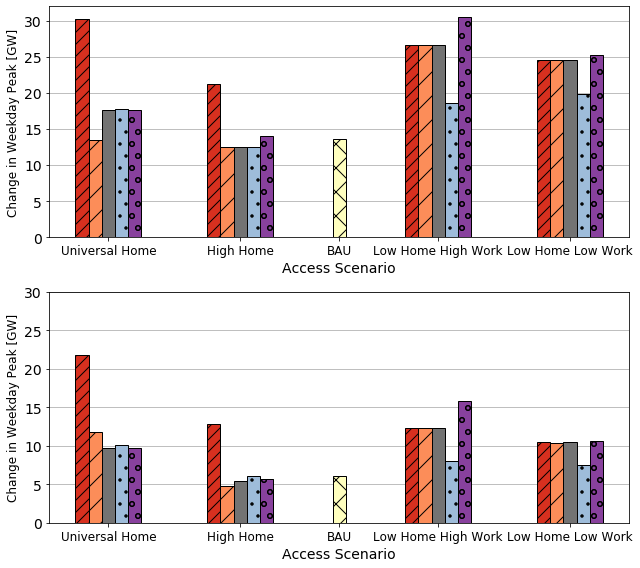

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(9, 8))
ax[0] = fig2((vals - refval1), ax[0], legend=False, save_str=None)
ax[1] = fig2((vals2 - refval2), ax[1], legend=False, save_str='supfig17_unlabeled')